               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [3],
                         'n_estimators': [15, 25, 50, 100, 150, 200, 250]},
             scoring='f1')

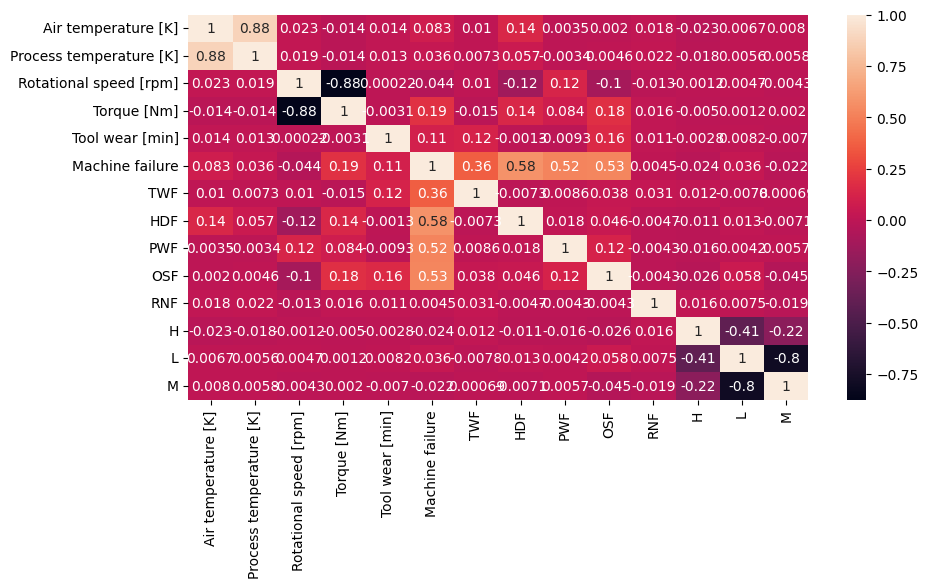

In [ ]:
#Importing Needed Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn import metrics



#Importing Dataset
tool_data = pd.read_csv("ai4i2020.csv")


#Exploratory Data Analysis
print(tool_data.describe())

#Checking Data types
print("\n", tool_data.dtypes)

#Dropping Uneeded columns
type_dummies = pd.get_dummies(tool_data["Type"])

#dropping uneeded columns and "Type, which was encoded and will be added back"
tool_data_updated = tool_data.drop(columns=["UDI", "Product ID", "Type"], axis=1)

#Combining the two dataframes
tool_data_updated = pd.concat([tool_data_updated, type_dummies], axis=1)

print("\n", tool_data_updated.head(10))


#Checking new data frame
print("\n", tool_data_updated.dtypes)

#Creating Heat Map
plt.figure(figsize=(10, 5))
sns.heatmap(data =tool_data_updated.corr(), annot=True)

#Setting Inputs and Target
X = tool_data_updated.drop(columns=["Machine failure"])

Y = tool_data_updated["Machine failure"]

#Splitting the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=17)

#CvGridSearch on an ols model, no data scaling
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=17)


param = {"n_estimators": [15, 25, 50, 100, 150, 200, 250], "max_depth":[3]}

Grid_search = GridSearchCV(estimator=RF, param_grid=param, cv=5, scoring='f1')

Grid_search.fit(X_train, y_train)





Training set score: 0.90
Test set score: 0.91
Best f1 score: 0.91

Best Model Parameters: RandomForestClassifier(max_depth=3, random_state=17)


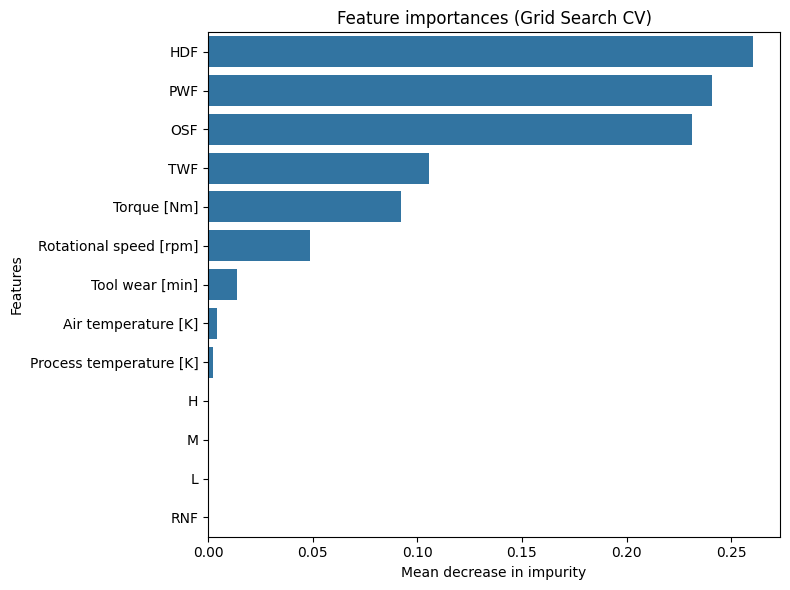

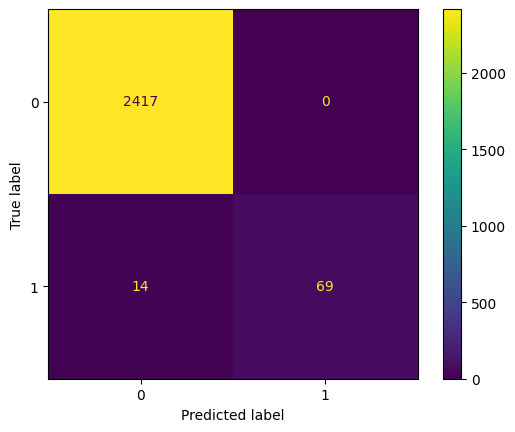

In [ ]:
#Testing Model Predictions
Y_preds = Grid_search.predict(X_test)

f1 = f1_score(y_test, Y_preds)

#Results
print("Training set score: {:.2f}".format(Grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Grid_search.score(X_test, y_test)))
print("Best f1 score: {:.2f}".format(f1)) 

#Best Parameters for the model
print("\nBest Model Parameters:", Grid_search.best_estimator_)

#Feature Importance Visualization
importances = Grid_search.best_estimator_.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns, name="Importance").sort_values(ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(
    x=feat_imp.values,
    y=feat_imp.index,
    orient="h"
)
plt.title("Feature importances (Grid Search CV)")
plt.xlabel("Mean decrease in impurity")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


#Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_test, Y_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()





